# Plotting 2.0

Last session, 003_Plotting, we introduced scatterplots. We will continue in this session with more real data and more complex scatter plot configurations, including:
1) Multiple axes
2) Error bands (vs error bands)
3) Saving your figure

__Additional Concepts__:
- Skipping rows when reading in data(frames)
- MultiIndexing in headers (https://pandas.pydata.org/docs/user_guide/advanced.html)

*Last edited: Isabella Casini 20.06.2025*

## 1) Import required packages

In [1]:
# import relevant packages (entire line is commented out)

import pandas as pd # call pandas "pd" for short (midline comment)

import matplotlib.pyplot as plt # import pyplot from matplotlib and call it "plt"

import numpy as np

## 2) Download data to graph

Go to the following link and save the Data_S3.xlsx file (*remember the location you save it*).

https://github.com/isacasini/Casini_2023_GEM/tree/main

Take a few minutes to look at the "ReadMe" sheet (in Excel).

## 3) Read in data of interest as a Pandas dataframe

We will use "Sheet14" (biomass - gCDW), "Sheet17" (hydrogen specific uptake),"Sheet19" (carbon dioxide specific uptake), "Sheet21" (methane specific production).

The sheets are not very clean, so we need to alter parameters how to read in our data in a useful fashion.

In [2]:
# Path to the file (change your path to where you save your file)
pathin = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\Sample_Data\Data_S3.xlsx"

### 3.1) Read in biomass data

In [3]:
# Read in the biomass data, ("skiprows" ->drop the first two rows; set the next two rows as combined header - MULTIINDEXING)
gcdw_df = pd.read_excel(pathin, sheet_name='Sheet14', skiprows=[0,1], header=[0,1])

In [4]:
# Take a look at the dataframe
gcdw_df

,Unnamed: 0_level_0,Reactor,2,4,5,7,1,2,3,4,5,6,7,8,ΔHAVG,ΔHSTD,ZZAVG,ZZSTD,MMAVG,MMSTD
,Unnamed: 0_level_1,Elasped Days,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW.1,gCDW,gCDW.1,gCDW.1,gCDW,gCDW.1,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW
0,NaN,0,0.015568,0.007995,0.007865,0.010978,0.008877,0.006296,0.009299,0.009171,0.006239,0.008473,0.012488,0.006868,0.0078,0.000584,0.008815,0.001928,0.011558,0.002703
1,NaN,1,0.046876,0.039166,0.04915,0.036549,0.065476,0.027696,0.055824,0.028052,0.004778,0.069443,0.057611,0.03692,0.04867,0.012846,0.030765,0.004092,0.056447,0.006612
2,NaN,1.7,0.039667,0.0286,0.038834,0.0264,0.062402,0.025435,0.051033,0.023532,0.003906,0.055252,0.046457,0.048318,0.042751,0.010036,0.025122,0.001191,0.04989,0.008279
3,NaN,2.6,0.041486,0.016037,0.035589,0.027909,0.055395,0.03281,0.046028,0.021867,0.00343,0.049529,0.037234,0.057803,0.039739,0.015821,0.027529,0.004476,0.045036,0.006741
4,NaN,3.6,0.035759,0.01795,0.021944,0.028329,0.054608,0.035427,0.046028,0.027101,0.013937,0.045923,0.032229,0.05356,0.034844,0.015206,0.030286,0.00367,0.042156,0.008797
5,SS,4.1,0.035288,0.021611,0.023608,0.028329,0.047673,0.033762,0.042811,0.026387,0.016237,0.040043,0.030513,0.033758,0.029755,0.007516,0.029493,0.003121,0.039071,0.006624
6,SS,4.8,0.035827,0.024357,0.025355,0.031181,0.047673,0.032572,0.047315,0.026625,0.012351,0.033614,0.031228,0.025938,0.027316,0.00368,0.030126,0.00254,0.040511,0.007171
7,SS,5.6,0.034344,0.027518,0.033509,0.030593,0.046958,0.031304,0.04896,0.026942,0.010051,0.035809,0.032872,0.023941,0.030194,0.004711,0.029613,0.001911,0.040783,0.007229
8,SS,6.8,0.034479,0.032427,0.037336,0.030761,0.046958,0.031304,0.045385,0.024801,0.010368,0.031419,0.032658,0.02028,0.030366,0.006238,0.028955,0.002946,0.03987,0.006359


In [5]:
# Look at the column names
print(gcdw_df.columns)

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1'),
            (           'Reactor',       'Elasped Days'),
            (                   2,               'gCDW'),
            (                   4,               'gCDW'),
            (                   5,               'gCDW'),
            (                   7,               'gCDW'),
            (                   1,               'gCDW'),
            (                   2,             'gCDW.1'),
            (                   3,               'gCDW'),
            (                   4,             'gCDW.1'),
            (                   5,             'gCDW.1'),
            (                   6,               'gCDW'),
            (                   7,             'gCDW.1'),
            (                   8,               'gCDW'),
            (             'ΔHAVG',               'gCDW'),
            (             'ΔHSTD',               'gCDW'),
            (             'ZZAVG',               'gCDW'),
            ( 

### 3.2) Extract out biomass data that we want to graph

In [6]:
# Note the structure of the column names: ('level1', 'level2')
columns_to_copy = [('Reactor','Elasped Days'),('ΔHAVG','gCDW'),('ΔHSTD','gCDW'),('ZZAVG','gCDW'),('ZZSTD','gCDW'),('MMAVG','gCDW'),('MMSTD','gCDW')]
gcdw_graph_df = gcdw_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc

In [7]:
# Check your dataframe
gcdw_graph_df

,Reactor,ΔHAVG,ΔHSTD,ZZAVG,ZZSTD,MMAVG,MMSTD
,Elasped Days,gCDW,gCDW,gCDW,gCDW,gCDW,gCDW
0,0,0.0078,0.000584,0.008815,0.001928,0.011558,0.002703
1,1,0.04867,0.012846,0.030765,0.004092,0.056447,0.006612
2,1.7,0.042751,0.010036,0.025122,0.001191,0.04989,0.008279
3,2.6,0.039739,0.015821,0.027529,0.004476,0.045036,0.006741
4,3.6,0.034844,0.015206,0.030286,0.00367,0.042156,0.008797
5,4.1,0.029755,0.007516,0.029493,0.003121,0.039071,0.006624
6,4.8,0.027316,0.00368,0.030126,0.00254,0.040511,0.007171
7,5.6,0.030194,0.004711,0.029613,0.001911,0.040783,0.007229
8,6.8,0.030366,0.006238,0.028955,0.002946,0.03987,0.006359


### 3.3) Read in H2 Data

In [8]:
# Read in the biomass data, ("skiprows" ->drop the first two rows, and the third one; no combined header)
h2_df = pd.read_excel(pathin, sheet_name='Sheet17', skiprows=[0,1,3], header=[0])

In [9]:
# Check your dataframe
h2_df

,Unnamed: 0,Elasped Days,Uptake H2_mmol/h/gCDW,Uptake H2_mmol/h/gCDW.1,Uptake H2_mmol/h/gCDW.2,Uptake H2_mmol/h/gCDW.3,Average H2,STDP H2,SS Average,SS STD,...,Unnamed: 22,Elasped Days.2,Uptake H2_mmol/h/gCDW.8,Uptake H2_mmol/h/gCDW.9,Uptake H2_mmol/h/gCDW.10,Uptake H2_mmol/h/gCDW.11,Average H2.2,STDP H2.2,SS Average.2,SS STD.2
0,NaN,0,239.476196,426.738308,10.024809,11.549805,171.947280,174.230350,208.492806,55.012368,...,NaN,0,4.841129,400.193067,11.979792,157.347749,143.590434,160.161564,136.118079,12.00762
1,NaN,1,69.775746,54.774674,0,0.000000,31.137605,7.500536,NaN,NaN,...,NaN,1,57.894818,42.069597,0.000000,0.000000,24.991104,7.912611,NaN,NaN
2,NaN,1.7,0.630981,0.457787,0,0.000000,0.272192,0.086597,NaN,NaN,...,NaN,1.7,0.451779,0.291487,0.000000,0.356421,0.274922,0.065831,NaN,NaN
3,NaN,2.6,-811.739315,-471.498523,0,0.000000,-320.809460,170.120396,NaN,NaN,...,NaN,2.6,-357.492827,-243.034046,0.000000,-318.239869,-229.691685,47.489792,NaN,NaN
4,NaN,3.6,1078.674344,861.634816,152.222268,89.482084,545.503378,432.098315,Average without gross error,STD without gross error,...,NaN,3.6,134.675745,120.571714,152.111691,126.198978,133.389532,11.918201,Average without gross error,STD without gross error
5,SS,4.1,313.081124,181.062269,185.905979,106.509599,196.639743,74.229222,234.362647,40.755969,...,SS,4.1,133.615868,137.174780,155.805130,132.917990,139.878442,9.335910,136.118079,12.00762
6,SS,4.8,299.900018,203.779789,216.406222,197.596879,229.420727,41.252039,NaN,NaN,...,SS,4.8,129.344382,125.984828,153.644807,124.835082,133.452275,11.775312,NaN,NaN
7,SS,5.6,251.487085,145.457198,192.001195,236.022016,206.241873,41.326625,NaN,NaN,...,SS,5.6,142.314350,141.012138,162.532769,126.412610,143.067967,12.855678,NaN,NaN
8,SS,6.8,204.847944,121.086931,221.346723,259.393931,201.668882,50.554317,NaN,NaN,...,SS,6.8,125.275478,138.160674,118.538567,130.319808,128.073632,7.168348,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Check the columns, when the dataframe was read in, suffixes were added to the column to prevent duplicates
print(h2_df.columns)

# Use the duplicated command to check for duplicate columns
print(h2_df.columns.duplicated())

Index(['Unnamed: 0', 'Elasped Days', 'Uptake H2_mmol/h/gCDW',
       'Uptake H2_mmol/h/gCDW.1', 'Uptake H2_mmol/h/gCDW.2',
       'Uptake H2_mmol/h/gCDW.3', 'Average H2', 'STDP H2', 'SS Average',
       'SS STD', 'Unnamed: 10', 'Unnamed: 11', 'Elasped Days.1',
       'Uptake H2_mmol/h/gCDW.4', 'Uptake H2_mmol/h/gCDW.5',
       'Uptake H2_mmol/h/gCDW.6', 'Uptake H2_mmol/h/gCDW.7', 'Average H2.1',
       'STDP H2.1', 'SS Average.1', 'SS STD.1', 'Unnamed: 21', 'Unnamed: 22',
       'Elasped Days.2', 'Uptake H2_mmol/h/gCDW.8', 'Uptake H2_mmol/h/gCDW.9',
       'Uptake H2_mmol/h/gCDW.10', 'Uptake H2_mmol/h/gCDW.11', 'Average H2.2',
       'STDP H2.2', 'SS Average.2', 'SS STD.2'],
      dtype='object')
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False]


### 3.4) Extract out the H2 data we want to graph

Average and STDP columns for the three microbes ($\Delta$ H, ZZ, MM)

In [11]:
# Note the different quotations
columns_to_copy = ['Elasped Days','Average H2','STDP H2','Average H2.1','STDP H2.1','Average H2.2','STDP H2.2']
h2_graph_df = h2_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc


In [12]:
# Check your dataframe
h2_graph_df

,Elasped Days,Average H2,STDP H2,Average H2.1,STDP H2.1,Average H2.2,STDP H2.2
0,0,171.947280,174.230350,322.239612,121.307290,143.590434,160.161564
1,1,31.137605,7.500536,57.904261,12.602066,24.991104,7.912611
2,1.7,0.272192,0.086597,0.716169,0.030931,0.274922,0.065831
3,2.6,-320.809460,170.120396,-352.302514,52.118881,-229.691685,47.489792
4,3.6,545.503378,432.098315,134.315144,15.573946,133.389532,11.918201
5,4.1,196.639743,74.229222,132.065536,19.031060,139.878442,9.335910
6,4.8,229.420727,41.252039,129.394706,24.852766,133.452275,11.775312
7,5.6,206.241873,41.326625,139.197879,28.186658,143.067967,12.855678
8,6.8,201.668882,50.554317,133.332354,25.973858,128.073632,7.168348


In [13]:
# Rename the columns using a dictionary (oldname:newname)
rename_dict = {'Average H2':'Average H2 DH','STDP H2':'STDP H2 DH','Average H2.1':'Average H2 ZZ',
               'STDP H2.1':'STDP H2 ZZ','Average H2.2':'Average H2 MM','STDP H2.2':'STDP H2 MM'}

h2_graph_df.rename(columns=rename_dict, inplace=True)

In [14]:
# Check your dataframe
h2_graph_df

,Elasped Days,Average H2 DH,STDP H2 DH,Average H2 ZZ,STDP H2 ZZ,Average H2 MM,STDP H2 MM
0,0,171.947280,174.230350,322.239612,121.307290,143.590434,160.161564
1,1,31.137605,7.500536,57.904261,12.602066,24.991104,7.912611
2,1.7,0.272192,0.086597,0.716169,0.030931,0.274922,0.065831
3,2.6,-320.809460,170.120396,-352.302514,52.118881,-229.691685,47.489792
4,3.6,545.503378,432.098315,134.315144,15.573946,133.389532,11.918201
5,4.1,196.639743,74.229222,132.065536,19.031060,139.878442,9.335910
6,4.8,229.420727,41.252039,129.394706,24.852766,133.452275,11.775312
7,5.6,206.241873,41.326625,139.197879,28.186658,143.067967,12.855678
8,6.8,201.668882,50.554317,133.332354,25.973858,128.073632,7.168348


### 3.5) Read in CO2 Data

In [15]:
# Read in the biomass data, ("skiprows" ->drop the first two rows, and the third one; no combined header)
co2_df = pd.read_excel(pathin, sheet_name='Sheet19', skiprows=[0,1,3], header=[0])

In [16]:
# Check your dataframe
co2_df

,Unnamed: 0,Elasped Days,Uptake CO2_mmol/h/gCDW,Uptake CO2_mmol/h/gCDW.1,Uptake CO2_mmol/h/gCDW.2,Uptake CO2_mmol/h/gCDW.3,Average CO2,STDP CO2,SS Average,SS STD,...,Unnamed: 22,Elasped Days.2,Uptake CO2_mmol/h/gCDW.8,Uptake CO2_mmol/h/gCDW.9,Uptake CO2_mmol/h/gCDW.10,Uptake CO2_mmol/h/gCDW.11,Average CO2.2,STDP CO2.2,SS Average.2,SS STD.2
0,NaN,0,-193.714444,-327.779113,30.393135,30.136108,-115.241078,153.031316,50.790528,16.194102,...,NaN,0,2.980369,-328.058393,31.466659,-117.608867,-102.805058,141.578307,33.797003,3.775198
1,NaN,1,10.919226,8.571704,0,0.000000,4.872732,1.173761,NaN,NaN,...,NaN,1,9.059976,6.583483,0.000000,0.000000,3.910865,1.238247,NaN,NaN
2,NaN,1.7,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,NaN,2.6,-218.060947,-116.719011,0,0.000000,-83.694990,50.670968,NaN,NaN,...,NaN,2.6,-89.046867,-59.870627,0.000000,-83.457271,-58.093691,12.643955,NaN,NaN
4,NaN,3.6,249.948872,200.084455,36.416161,20.651986,126.775368,99.966110,Average without gross error,STD without gross error,...,NaN,3.6,35.380843,28.708366,45.386071,31.731299,35.301645,6.283324,Average without gross error,NaN
5,SS,4.1,84.163468,57.264013,44.501807,21.728006,51.914323,22.554299,58.178484,11.48726,...,SS,4.1,35.153394,32.041283,40.706271,32.975272,35.219055,3.363281,33.797003,3.775198
6,SS,4.8,71.142678,39.720959,52.444532,42.430024,51.434548,12.325989,NaN,NaN,...,SS,4.8,28.398614,28.675619,35.101848,29.652287,30.457092,2.721785,NaN,NaN
7,SS,5.6,57.834101,27.902171,52.469255,52.271508,47.619259,11.600350,NaN,NaN,...,SS,5.6,33.033808,34.722974,40.273898,28.428273,34.114738,4.237024,NaN,NaN
8,SS,6.8,55.235786,26.069981,62.667884,64.802278,52.193982,15.495061,NaN,NaN,...,SS,6.8,34.155103,36.599740,38.155563,32.678096,35.397125,2.120790,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.110720,NaN,NaN


### 3.6) Extract out CO2 data that we want to graph

Average and STDP columns for the three microbes ($\Delta$ H, ZZ, MM)

In [17]:
# Note the different quotations
columns_to_copy = ['Elasped Days','Average CO2','STDP CO2','Average CO2.1','STDP CO2.1','Average CO2.2','STDP CO2.2']
co2_graph_df = co2_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc


In [18]:
# Rename the columns using a dictionary (oldname:newname)
rename_dict = {'Average CO2':'Average CO2 DH','STDP CO2':'STDP CO2 DH','Average CO2.1':'Average CO2 ZZ',
               'STDP CO2.1':'STDP CO2 ZZ','Average CO2.2':'Average CO2 MM','STDP CO2.2':'STDP CO2 MM'}

co2_graph_df.rename(columns=rename_dict, inplace=True)

In [19]:
# Check your dataframe
co2_graph_df

,Elasped Days,Average CO2 DH,STDP CO2 DH,Average CO2 ZZ,STDP CO2 ZZ,Average CO2 MM,STDP CO2 MM
0,0,-115.241078,153.031316,-245.440350,122.935357,-102.805058,141.578307
1,1,4.872732,1.173761,9.061454,1.972101,3.910865,1.238247
2,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.6,-83.694990,50.670968,-90.580113,16.699214,-58.093691,12.643955
4,3.6,126.775368,99.966110,29.689902,4.602953,35.301645,6.283324
5,4.1,51.914323,22.554299,32.965501,7.466037,35.219055,3.363281
6,4.8,51.434548,12.325989,24.606231,5.362620,30.457092,2.721785
7,5.6,47.619259,11.600350,26.941878,8.447732,34.114738,4.237024
8,6.8,52.193982,15.495061,30.983134,9.355973,35.397125,2.120790


### 3.7) Read in CH4 data

In [20]:
# Read in the biomass data, ("skiprows" ->drop the first two rows, and the third one; no combined header)
ch4_df = pd.read_excel(pathin, sheet_name='Sheet21', skiprows=[0,1,3], header=[0])

In [21]:
# Check your dataframe
ch4_df

,Unnamed: 0,Elasped Days,Production CH4_mmol/h/gCDW,Production CH4_mmol/h/gCDW.1,Production CH4_mmol/h/gCDW.2,Production CH4_mmol/h/gCDW.3,Average CH4,STDP CH4,SS Average,SS STD,...,Unnamed: 22,Elasped Days.2,Production CH4_mmol/h/gCDW.8,Production CH4_mmol/h/gCDW.9,Production CH4_mmol/h/gCDW.10,Production CH4_mmol/h/gCDW.11,Average CH4.2,STDP CH4.2,SS Average.2,SS STD.2
0,NaN,0,0,0,0,0.000000,0.000000,0.000000,51.847407,11.228807,...,NaN,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.83391,4.924634
1,NaN,1,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,NaN,1.7,0,0,0,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,NaN,2.6,85.03992,27.944488,0,0.000000,28.246102,28.547716,NaN,NaN,...,NaN,2.6,27.243121,29.241487,0.000000,27.096448,20.895264,0.978444,NaN,NaN
4,NaN,3.6,5.26069,4.942562,36.764789,21.631243,17.149821,13.183311,Average without gross error,STD without gross error,...,NaN,3.6,25.802912,24.045733,36.362215,24.818219,27.757270,5.006948,Average without gross error,STD without gross error
5,SS,4.1,64.369255,71.979442,39.630276,29.804344,51.445829,17.295992,52.501547,8.531141,...,SS,4.1,26.149497,27.349342,38.798293,28.894731,30.297965,5.003219,28.83391,4.924634
6,SS,4.8,59.476756,63.110336,48.035366,46.981690,54.401037,7.021099,NaN,NaN,...,SS,4.8,23.260159,26.238128,37.928945,25.917888,28.336280,5.657674,NaN,NaN
7,SS,5.6,51.31982,48.918247,43.741191,54.817726,49.699246,4.029066,NaN,NaN,...,SS,5.6,25.253578,27.674554,37.994619,24.042521,28.741318,5.500104,NaN,NaN
8,SS,6.8,43.111591,38.229125,64.063275,61.970071,51.843516,11.329914,NaN,NaN,...,SS,6.8,24.538357,27.538339,31.744154,28.019458,27.960077,2.559727,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.8) Extract out CH4 data that we want to graph

Average and STDP columns for the three microbes ($\Delta$ H, ZZ, MM)

In [22]:
# Note the different quotations
columns_to_copy = ['Elasped Days','Average CH4','STDP CH4','Average CH4.1','STDP CH4.1','Average CH4.2','STDP CH4.2']
ch4_graph_df = ch4_df[columns_to_copy].iloc[:9].copy() # select the rows with .iloc

In [23]:
# Rename the columns using a dictionary to add the microbe ID (oldname:newname)
rename_dict = {'Average CH4':'Average CH4 DH','STDP CH4':'STDP CH4 DH','Average CH4.1':'Average CH4 ZZ',
               'STDP CH4.1':'STDP CH4 ZZ','Average CH4.2':'Average CH4 MM','STDP CH4.2':'STDP CH4 MM'}

ch4_graph_df.rename(columns=rename_dict, inplace=True)

In [24]:
ch4_graph_df

,Elasped Days,Average CH4 DH,STDP CH4 DH,Average CH4 ZZ,STDP CH4 ZZ,Average CH4 MM,STDP CH4 MM
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2.6,28.246102,28.547716,21.955117,2.868627,20.895264,0.978444
4,3.6,17.149821,13.183311,29.811941,1.815610,27.757270,5.006948
5,4.1,51.445829,17.295992,30.422011,1.711626,30.297965,5.003219
6,4.8,54.401037,7.021099,29.117535,2.990479,28.336280,5.657674
7,5.6,49.699246,4.029066,30.268749,4.040437,28.741318,5.500104
8,6.8,51.843516,11.329914,31.956390,5.146223,27.960077,2.559727


## 4) Graph strain ZZ data on a single graph, with multiple axes

In [25]:
# Define some graph parameters

# Colors for each compound
color_gcdw = "#00bb3e"
color_h2 = "#00a0a0"
color_co2 = "#3678fb"
color_ch4 = "#fc0966"

### 4.1) Start with biomass data

In [26]:
# Print the columns
gcdw_graph_df.columns

MultiIndex([('Reactor', 'Elasped Days'),
            (  'ΔHAVG',         'gCDW'),
            (  'ΔHSTD',         'gCDW'),
            (  'ZZAVG',         'gCDW'),
            (  'ZZSTD',         'gCDW'),
            (  'MMAVG',         'gCDW'),
            (  'MMSTD',         'gCDW')],
           )

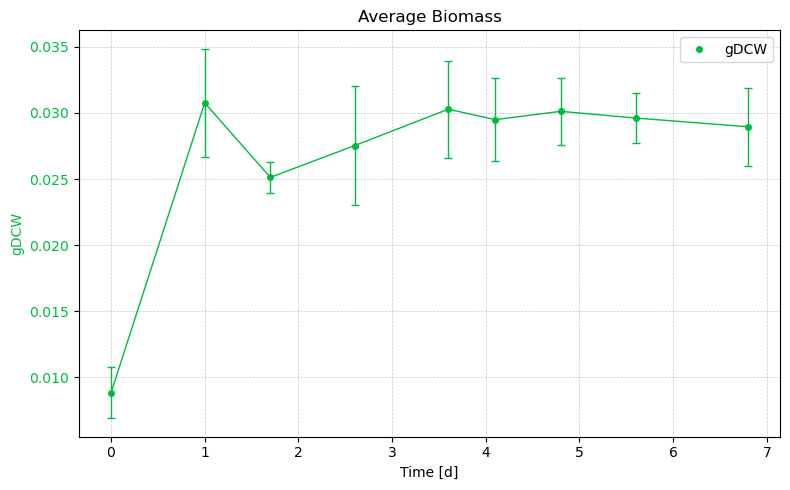

In [27]:
# Graph
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # set the figure dimensions inches

#-----------------------------------------------------------------------------------
# Plot Strain ZZ (gCDW) with error bars
ax1.errorbar(gcdw_graph_df[('Reactor','Elasped Days')], gcdw_graph_df[('ZZAVG','gCDW')], yerr=gcdw_graph_df[('ZZSTD','gCDW')], 
             color=color_gcdw, label="gDCW", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Remove errorbar handles from the legend by plotting invisible points for legend only
handles, labels = ax1.get_legend_handles_labels()
ax1.legend([plt.Line2D([0], [0], color=color_gcdw, marker='o', linestyle='', linewidth=1, markersize=4)],
           ["gDCW"])

#-----------------------------------------------------------------------------------
# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Set axes labels and colors
ax1.set_xlabel("Time [d]")

# Label the first y-axis
ax1.set_ylabel("gDCW", color=color_gcdw)
ax1.tick_params(axis='y', labelcolor=color_gcdw)
#--------------------------------------------------------------------------------------
# Add a title
ax1.set_title("Average Biomass")

# Clean up the layout
fig.tight_layout()

# Show the plot
plt.show()


### 4.2) Add in CO2 on a second axis

In [28]:
co2_graph_df.columns

Index(['Elasped Days', 'Average CO2 DH', 'STDP CO2 DH', 'Average CO2 ZZ',
       'STDP CO2 ZZ', 'Average CO2 MM', 'STDP CO2 MM'],
      dtype='object')

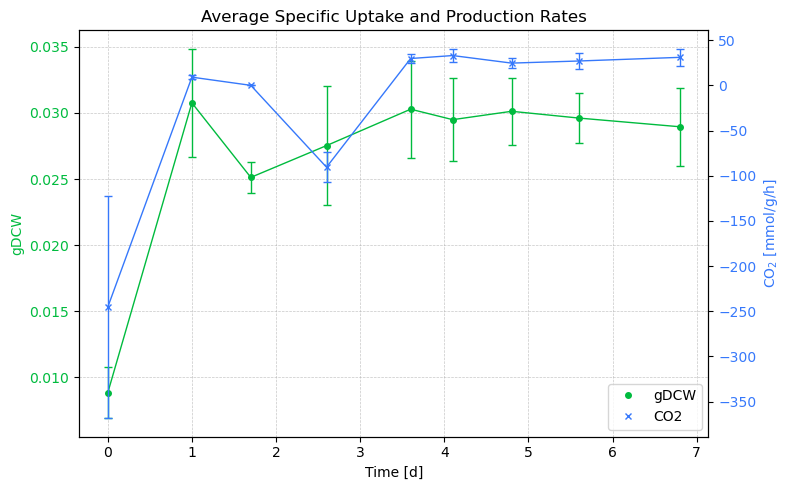

In [29]:
# Graph
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # set the figure dimensions inches

#-----------------------------------------------------------------------------------
# Plot Strain ZZ gCDW with error bars
ax1.errorbar(gcdw_graph_df[('Reactor','Elasped Days')], gcdw_graph_df[('ZZAVG','gCDW')], yerr=gcdw_graph_df[('ZZSTD','gCDW')], 
             color=color_gcdw, label="gDCW", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Plot CO2

# Create second y-axis
ax2 = ax1.twinx()

# Plot Strain ZZ CO2 with error bars
ax2.errorbar(co2_graph_df['Elasped Days'], co2_graph_df['Average CO2 ZZ'], yerr=co2_graph_df['STDP CO2 ZZ'], 
             color=color_co2, label="CO2", marker='x', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Legend
# Manually create legend handles for both datasets
gcdw_handle = plt.Line2D([0], [0], color=color_gcdw, marker='o', linestyle='', linewidth=1, markersize=4)
co2_handle = plt.Line2D([0], [0], color=color_co2, marker='x', linestyle='', linewidth=1, markersize=4)

ax1.legend([gcdw_handle, co2_handle], ["gDCW", "CO2"],loc="lower right")
#-----------------------------------------------------------------------------------

# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


# Set axes labels and colors
ax1.set_xlabel("Time [d]")

# Label the first y-axis
ax1.set_ylabel("gDCW", color=color_gcdw)
ax1.tick_params(axis='y', labelcolor=color_gcdw)

# # Label the second y-axis
ax2.set_ylabel("CO$_{2}$ [mmol/g/h]", color=color_co2)
ax2.tick_params(axis='y', labelcolor=color_co2)
#--------------------------------------------------------------------------------------
# Add a title
ax1.set_title("Average Specific Uptake and Production Rates")

# Clean up the layout
fig.tight_layout()

# Show the plot
plt.show()


### 4.3) Add CH4 on a third axis

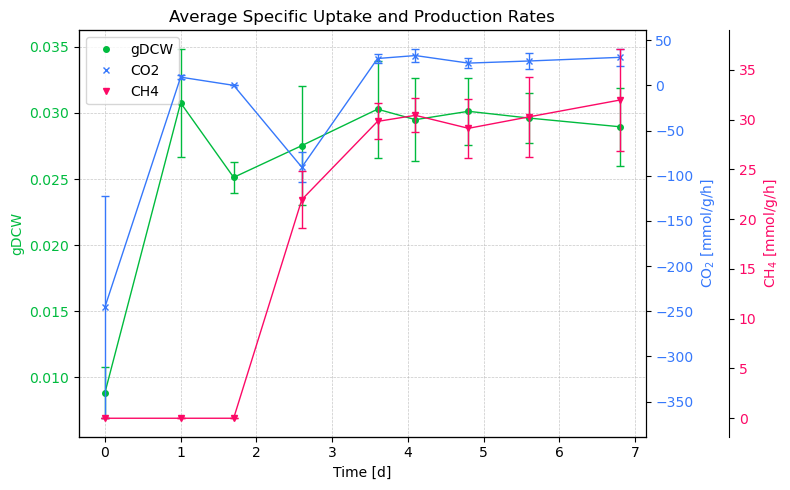

In [30]:
# Graph
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # set the figure dimensions inches

#-----------------------------------------------------------------------------------
# Plot Strain ZZ gCDW with error bars
ax1.errorbar(gcdw_graph_df[('Reactor','Elasped Days')], gcdw_graph_df[('ZZAVG','gCDW')], yerr=gcdw_graph_df[('ZZSTD','gCDW')], 
             color=color_gcdw, label="gDCW", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Plot CO2
# Create second y-axis
ax2 = ax1.twinx()

# Plot Strain ZZ CO2 with error bars
ax2.errorbar(co2_graph_df['Elasped Days'], co2_graph_df['Average CO2 ZZ'], yerr=co2_graph_df['STDP CO2 ZZ'], 
             color=color_co2, label="CO2", marker='x', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)
#-----------------------------------------------------------------------------------
# Plot CH4
# Create a third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis


ax3.errorbar(ch4_graph_df['Elasped Days'], ch4_graph_df['Average CH4 ZZ'], yerr=ch4_graph_df['STDP CH4 ZZ'], 
             color=color_ch4, label="CH4", marker='v', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Legend
# Manually create legend handles for both datasets
gcdw_handle = plt.Line2D([0], [0], color=color_gcdw, marker='o', linestyle='', linewidth=1, markersize=4)
co2_handle = plt.Line2D([0], [0], color=color_co2, marker='x', linestyle='', linewidth=1, markersize=4)
ch4_handle = plt.Line2D([0], [0], color=color_ch4, marker='v', linestyle='', linewidth=1, markersize=4)

ax1.legend([gcdw_handle, co2_handle,ch4_handle], ["gDCW", "CO2","CH4"],loc='upper left')
#-----------------------------------------------------------------------------------

# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Set axes labels and colors
ax1.set_xlabel("Time [d]")

# Label the first y-axis
ax1.set_ylabel("gDCW", color=color_gcdw)
ax1.tick_params(axis='y', labelcolor=color_gcdw)

# # Label the second y-axis
ax2.set_ylabel("CO$_{2}$ [mmol/g/h]", color=color_co2)
ax2.tick_params(axis='y', labelcolor=color_co2)

# Label the third y-axis
ax3.set_ylabel("CH$_{4}$ [mmol/g/h]", color=color_ch4)
ax3.tick_params(axis='y', labelcolor=color_ch4)
#--------------------------------------------------------------------------------------
# Add a title
ax1.set_title("Average Specific Uptake and Production Rates")

# Clean up the layout
fig.tight_layout()

# Show the plot
plt.show()


### 4.4) Add H2 on a fourth axis

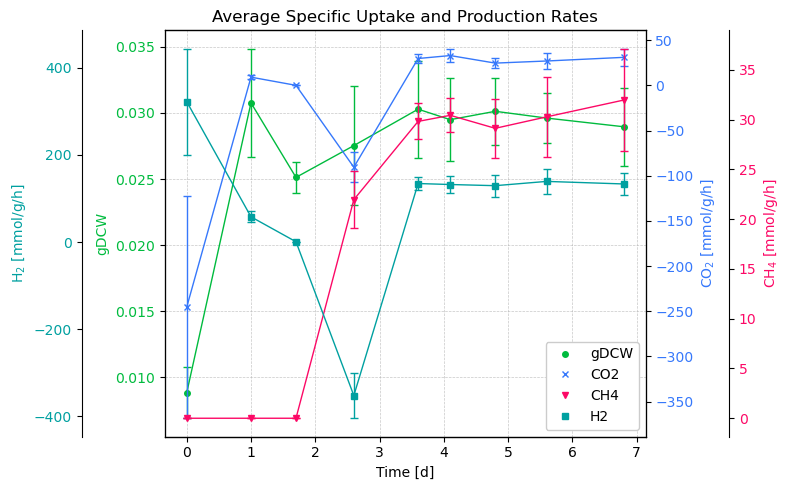

In [31]:
# Graph
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # set the figure dimensions inches

#-----------------------------------------------------------------------------------
# Plot Strain ZZ gCDW with error bars
ax1.errorbar(gcdw_graph_df[('Reactor','Elasped Days')], gcdw_graph_df[('ZZAVG','gCDW')], yerr=gcdw_graph_df[('ZZSTD','gCDW')], 
             color=color_gcdw, label="gDCW", marker='o', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Plot CO2
# Create second y-axis
ax2 = ax1.twinx()

# Plot Strain ZZ CO2 with error bars
ax2.errorbar(co2_graph_df['Elasped Days'], co2_graph_df['Average CO2 ZZ'], yerr=co2_graph_df['STDP CO2 ZZ'], 
             color=color_co2, label="CO2", marker='x', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)
#-----------------------------------------------------------------------------------
# Plot CH4
# Create a third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis


ax3.errorbar(ch4_graph_df['Elasped Days'], ch4_graph_df['Average CH4 ZZ'], yerr=ch4_graph_df['STDP CH4 ZZ'], 
             color=color_ch4, label="CH4", marker='v', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)

#-----------------------------------------------------------------------------------
# Plot H2
# Create a fourth y-axis
ax4 = ax1.twinx()
ax4.spines['left'].set_position(('outward', 60))  # Offset the third axis
ax4.yaxis.set_label_position('left')
ax4.yaxis.set_ticks_position('left')

ax4.errorbar(h2_graph_df['Elasped Days'], h2_graph_df['Average H2 ZZ'], yerr=h2_graph_df['STDP H2 ZZ'], 
             color=color_h2, label="H2", marker='s', markersize=4, 
             linewidth=1, linestyle='-', capsize=3)
#-----------------------------------------------------------------------------------
# Legend
# Manually create legend handles for both datasets
gcdw_handle = plt.Line2D([0], [0], color=color_gcdw, marker='o', linestyle='', linewidth=1, markersize=4)
co2_handle = plt.Line2D([0], [0], color=color_co2, marker='x', linestyle='', linewidth=1, markersize=4)
ch4_handle = plt.Line2D([0], [0], color=color_ch4, marker='v', linestyle='', linewidth=1, markersize=4)
h2_handle = plt.Line2D([0], [0], color=color_h2, marker='s', linestyle='', linewidth=1, markersize=4)


ax1.legend([gcdw_handle, co2_handle,ch4_handle,h2_handle], ["gDCW", "CO2","CH4","H2"],loc='lower right',framealpha=1)
#-----------------------------------------------------------------------------------
# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


# Set axes labels and colors
ax1.set_xlabel("Time [d]")

# Label the first y-axis
ax1.set_ylabel("gDCW", color=color_gcdw)
ax1.tick_params(axis='y', labelcolor=color_gcdw)

# # Label the second y-axis
ax2.set_ylabel("CO$_{2}$ [mmol/g/h]", color=color_co2)
ax2.tick_params(axis='y', labelcolor=color_co2)

# Label the third y-axis
ax3.set_ylabel("CH$_{4}$ [mmol/g/h]", color=color_ch4)
ax3.tick_params(axis='y', labelcolor=color_ch4)

# Label the fourth y-axis
ax4.set_ylabel("H$_{2}$ [mmol/g/h]", color=color_h2)
ax4.tick_params(axis='y', labelcolor=color_h2)

#--------------------------------------------------------------------------------------
# Add a title
ax1.set_title("Average Specific Uptake and Production Rates")

# Clean up the layout
fig.tight_layout()

# Show the plot
plt.show()


## 5) Graph using a different style error bar - error bands.

__Note1: This type of graph requires numpy numbers (*e.g.* np.float64), so we need to convert out datatypes__

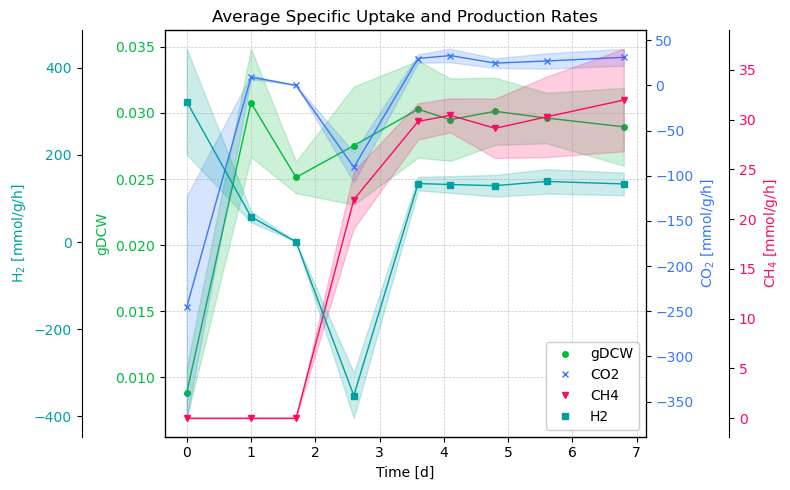

In [32]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # inches

#-----------------------------------------------------------------------------------
# Plot Biomass with error band
ax1.plot(gcdw_graph_df[('Reactor','Elasped Days')], gcdw_graph_df[('ZZAVG','gCDW')], 
             color=color_gcdw, label="gDCW", marker='o', markersize=4, 
             linewidth=1, linestyle='-')

# CONVERT TO NUMPY FLOAT (each time for the bands)
ax1.fill_between(np.float64(gcdw_graph_df[('Reactor','Elasped Days')]),
                 np.float64(gcdw_graph_df[('ZZAVG','gCDW')] - gcdw_graph_df[('ZZSTD','gCDW')]),
                 np.float64(gcdw_graph_df[('ZZAVG','gCDW')] + gcdw_graph_df[('ZZSTD','gCDW')]),
                 color=color_gcdw, alpha=0.2)
#----------------------------------------------------------------
# Plot CO2 with error band

# Create second y-axis
ax2 = ax1.twinx()

ax2.plot(co2_graph_df['Elasped Days'], co2_graph_df['Average CO2 ZZ'], 
             color=color_co2, label="CO2", marker='x', markersize=4, 
             linewidth=1, linestyle='-')

ax2.fill_between(np.float64(co2_graph_df['Elasped Days']),
                 np.float64(co2_graph_df['Average CO2 ZZ'] - co2_graph_df['STDP CO2 ZZ']),
                 np.float64(co2_graph_df['Average CO2 ZZ'] + co2_graph_df['STDP CO2 ZZ']),
                 color=color_co2, alpha=0.2)
#----------------------------------------------------------------
# Plot CH4 with error band

# Create third y-axis
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis

ax3.plot(ch4_graph_df['Elasped Days'], ch4_graph_df['Average CH4 ZZ'], 
             color=color_ch4, label="CH4", marker='v', markersize=4, 
             linewidth=1, linestyle='-')

ax3.fill_between(np.float64(ch4_graph_df['Elasped Days']),
                 np.float64(ch4_graph_df['Average CH4 ZZ'] - ch4_graph_df['STDP CH4 ZZ']),
                 np.float64(ch4_graph_df['Average CH4 ZZ'] + ch4_graph_df['STDP CH4 ZZ']),
                 color=color_ch4, alpha=0.2)
#-----------------------------------------------------------------------------------
# Plot H2 with error band

# Create fourth y-axis
ax4 = ax1.twinx()
ax4.spines['left'].set_position(('outward', 60))  # Offset the fourth axis
ax4.yaxis.set_label_position('left')
ax4.yaxis.set_ticks_position('left')

ax4.plot(h2_graph_df['Elasped Days'], h2_graph_df['Average H2 ZZ'], 
             color=color_h2, label="H2", marker='s', markersize=4, 
             linewidth=1, linestyle='-')

ax4.fill_between(np.float64(h2_graph_df['Elasped Days']),
                 np.float64(h2_graph_df['Average H2 ZZ'] - h2_graph_df['STDP H2 ZZ']),
                 np.float64(h2_graph_df['Average H2 ZZ'] + h2_graph_df['STDP H2 ZZ']),
                 color=color_h2, alpha=0.2)
#-----------------------------------------------------------------------------------
# Legend
# Manually create legend handles for both datasets
gcdw_handle = plt.Line2D([0], [0], color=color_gcdw, marker='o', linestyle='', linewidth=1, markersize=4)
co2_handle = plt.Line2D([0], [0], color=color_co2, marker='x', linestyle='', linewidth=1, markersize=4)
ch4_handle = plt.Line2D([0], [0], color=color_ch4, marker='v', linestyle='', linewidth=1, markersize=4)
h2_handle = plt.Line2D([0], [0], color=color_h2, marker='s', linestyle='', linewidth=1, markersize=4)


ax1.legend([gcdw_handle, co2_handle,ch4_handle,h2_handle], ["gDCW", "CO2","CH4","H2"],loc='lower right',framealpha=1)
#-----------------------------------------------------------------------------------
# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


# Set axes labels and colors
ax1.set_xlabel("Time [d]")

# Label the first y-axis
ax1.set_ylabel("gDCW", color=color_gcdw)
ax1.tick_params(axis='y', labelcolor=color_gcdw)

# # Label the second y-axis
ax2.set_ylabel("CO$_{2}$ [mmol/g/h]", color=color_co2)
ax2.tick_params(axis='y', labelcolor=color_co2)

# Label the third y-axis
ax3.set_ylabel("CH$_{4}$ [mmol/g/h]", color=color_ch4)
ax3.tick_params(axis='y', labelcolor=color_ch4)

# Label the fourth y-axis
ax4.set_ylabel("H$_{2}$ [mmol/g/h]", color=color_h2)
ax4.tick_params(axis='y', labelcolor=color_h2)

#--------------------------------------------------------------------------------------
# Add a title
ax1.set_title("Average Specific Uptake and Production Rates")

# Clean up the layout
fig.tight_layout()

# Save the figure
# Give a file location and name and extension (.svg) --> Change yours (this is for my system)
pathout = r"C:\Users\uqicasin\Documents\Teaching\Program_Workshop\Uptake_Production_figure.svg"
fig.savefig(pathout, dpi=300, bbox_inches='tight') # give the resolution


# Show the plot
plt.show()
